petgraph review/tutorial
---------------
- Author: [Timothy Hobbs](https://timothy.hobbs.cz)
- License: [CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/)
- Written: 10.2019

[project homepage](https://github.com/petgraph/petgraph) [ipynb](./petgraph_review.ipynb)

petgraph is a rust library which allows you to work with graph data structures in rust.

In [2]:
:dep petgraph = "0.4.13"

In [3]:
:dep petgraph-evcxr = "*"

In [4]:
extern crate petgraph;
use petgraph::graph::Graph;
use petgraph::dot::Dot;

In [5]:
use petgraph_evcxr::draw_graph;

I guess I'll start by specifying what kind of graphs we're talking about. We're talking about the datastructure type of graph, not the 'chart' type of graph. For the chart type of graph try the [plotters](https://github.com/38/plotters#trying-with-jupyter-evcxr-kernel-interactively) library.

In [6]:
:dep plotters = { git = "https://github.com/38/plotters", default_features = false, features = ["evcxr"] }

In [7]:
extern crate plotters;
use plotters::prelude::*;

let figure = evcxr_figure((640, 480), |root| {
    root.fill(&WHITE);
    let mut chart = ChartBuilder::on(&root)
        .caption("Not this type of graph", ("Arial", 50).into_font())
        .margin(5)
        .x_label_area_size(30)
        .y_label_area_size(30)
        .build_ranged(-1f32..1f32, -0.1f32..1f32)?;

    chart.configure_mesh().draw()?;

    chart.draw_series(LineSeries::new(
        (-50..=50).map(|x| x as f32 / 50.0).map(|x| (x, x * x)),
        &RED,
    )).unwrap()
        .label("y = x^2")
        .legend(|(x,y)| Path::new(vec![(x,y), (x + 20,y)], &RED));

    chart.configure_series_labels()
        .background_style(&WHITE.mix(0.8))
        .border_style(&BLACK)
        .draw()?;
    Ok(())
});
figure

Not this type of graph
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
0.0
 
 
 
0.2
 
 
 
0.4
 
 
 
0.6
 
 
 
0.8
 
 
 
1.0
 
 
 
 
-0.8
 
 
 
-0.6
 
 
 
-0.4
 
 
 
-0.2
 
 
 
0.0
 
 
 
0.2
 
 
 
0.4
 
 
 
0.6
 
 
 
0.8
 
 
<polyline fill="none" opacity="1" points="35,57 41,70 47,84 53,98 59,111 65,124 71,136 77,148 83,160 89,172 95,183 101,195 107,205 113,216 119,226 125,236 131,246 137,256 143,265 149,274 155,282 161,291 167,299 173,306 179,314 185,321 191,328 197,335 203,341 209,347 215,353 221,358 227,364 233,368 239,373 245,377 251,382 257,385 263,389 269,392 275,395 281,398 287,400 293,402 299,404 305,406 311,407 317,408 323,409 329,409 335,409 341,409 347,409 353,408 359,407 365,406 371,404 377,402 383,400 389,398 395,395 401,392 407,389 413,385 419,382 425,377 431,373 437,368 443,364 449,358 455,353 461,347 467,341 473,335 479,328 485,321 491,314 497,306 503,299 509,291 515,282 521,274 527,265 533,256 539,246 545,236 551,226 557,216 563,205 569,195 575,183 581,172 587,160 593,148 599,136 605,124 611,111 617,98 623,84 629,70 635,57 " stroke="#FF0000" stroke-width="1"/>
 
 
 
y = x^2

This is an example of a graph. You can create a graph in petgraph by initializing a `Graph` struct and adding some nodes and edges to it.

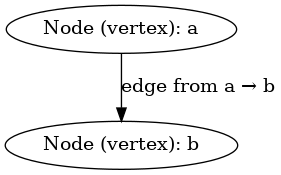

In [8]:
let mut g : Graph<&str, &str> = Graph::new();
let a = g.add_node("Node (vertex): a");
let b = g.add_node("Node (vertex): b");
g.add_edge(a, b, "edge from a → b");
draw_graph(&g);

Graphs are universal datastructures. Every data structure can be represented as a graph. Here are some examples of data structures that can be represented as graphs.

- variables
- lists
- tables
- trees
- ring buffers
- dictionaries


Variables
----------

A variable can be represented, from a theoretical standpoint, as a singleton graph.

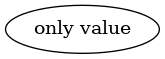

In [9]:
let mut singleton : Graph<&str, &str, petgraph::Undirected> = Graph::new_undirected();
let singleton_node = singleton.add_node("only value");
draw_graph(&singleton);

Lists
-----

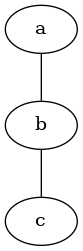

In [10]:
let mut list : Graph<&str, &str, petgraph::Undirected> = Graph::new_undirected();
let item1 = list.add_node("a");
let item2 = list.add_node("b");
let item3 = list.add_node("c");
list.add_edge(item1, item2, "");
list.add_edge(item2, item3, "");
draw_graph(&list);

Tables
------

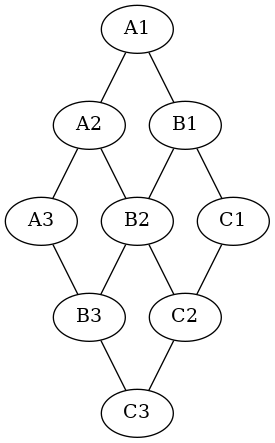

In [11]:
let mut table : Graph<&str, &str, petgraph::Undirected> = Graph::new_undirected();
let cellA1 = table.add_node("A1");
let cellA2 = table.add_node("A2");
let cellA3 = table.add_node("A3");

let cellB1 = table.add_node("B1");
let cellB2 = table.add_node("B2");
let cellB3 = table.add_node("B3");

let cellC1 = table.add_node("C1");
let cellC2 = table.add_node("C2");
let cellC3 = table.add_node("C3");

// Columns
table.add_edge(cellA1, cellA2, "");
table.add_edge(cellA2, cellA3, "");

table.add_edge(cellB1, cellB2, "");
table.add_edge(cellB2, cellB3, "");

table.add_edge(cellC1, cellC2, "");
table.add_edge(cellC2, cellC3, "");

// Rows
table.add_edge(cellA1, cellB1, "");
table.add_edge(cellB1, cellC1, "");

table.add_edge(cellA2, cellB2, "");
table.add_edge(cellB2, cellC2, "");

table.add_edge(cellA3, cellB3, "");
table.add_edge(cellB3, cellC3, "");

draw_graph(&table);

Trees
-----

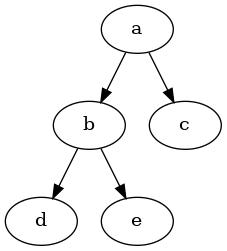

In [12]:
let mut tree : Graph<&str, &str, petgraph::Directed> = Graph::new();
let tree_item1 = tree.add_node("a");
let tree_item2 = tree.add_node("b");
let tree_item3 = tree.add_node("c");
let tree_item4 = tree.add_node("d");
let tree_item5 = tree.add_node("e");
tree.add_edge(tree_item1, tree_item2, "");
tree.add_edge(tree_item1, tree_item3, "");
tree.add_edge(tree_item2, tree_item4, "");
tree.add_edge(tree_item2, tree_item5, "");
draw_graph(&tree);

Rings
-----

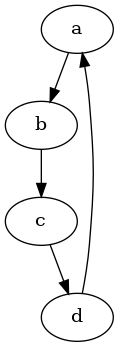

In [13]:
let mut ring : Graph<&str, &str> = Graph::new();
let ring_item1 = ring.add_node("a");
let ring_item2 = ring.add_node("b");
let ring_item3 = ring.add_node("c");
let ring_item4 = ring.add_node("d");
ring.add_edge(ring_item1, ring_item2, "");
ring.add_edge(ring_item2, ring_item3, "");
ring.add_edge(ring_item3, ring_item4, "");
ring.add_edge(ring_item4, ring_item1, "");
draw_graph(&ring);

Dictionaries
------------

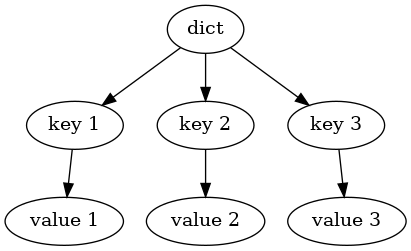

In [14]:
let mut dict : Graph<&str, &str> = Graph::new();
let core = dict.add_node("dict");

let key1 = dict.add_node("key 1");
let key2 = dict.add_node("key 2");
let key3 = dict.add_node("key 3");

let value1 = dict.add_node("value 1");
let value2 = dict.add_node("value 2");
let value3 = dict.add_node("value 3");

dict.add_edge(core, key1, "");
dict.add_edge(core, key2, "");
dict.add_edge(core, key3, "");

dict.add_edge(key1, value1, "");
dict.add_edge(key2, value2, "");
dict.add_edge(key3, value3, "");
draw_graph(&dict);

Basic petgaph usage
-----------------------------

In petgraph there are various ways of storing a graph. The simplest is to use the [`Graph`](https://docs.rs/petgraph/0.4.13/petgraph/graph/struct.Graph.html) data type. `Graph`s can be either Directed or Undirected. (Note: Graphs are stored the same way whether they are Directed or Undirected. All graphs are stored internally as directed graphs. The only difference is the behavior of some algorithms such as the shortest path algorithms. )

You can initialize a directed graph with the statement:

```rust
let mut directed_graph : Graph<&str, &str> = Graph::new();
```

You can initialize an undirected graph with the statement:

```rust
let mut undirected_graph : Graph<&str, &str, petgraph::Undirected> = Graph::new_undirected();
```

You may have noticed that we specify the `Graph`'s type with two type parameters `&str` and `&str`.

The first parameter is the `Node` weight. This is the data that is associated with the node. Weights are sometimes refered to as labels.

The second parameter is the `Edge` weight.

With petgraph you can store any type of data as node or edge weights. Lets create a simple social graph to demonstrate this fact.

In [15]:
use std::fmt;

#[derive(Debug, Copy, Clone)]
struct Person<'a> {
    name: &'a str,
    age: u8,
}

#[derive(Debug, Copy, Clone)]
enum Relationship {
    Friend,
    Parent,
    Sibling,
    Child,
    Boss,
}

impl<'a> fmt::Display for Person<'a> {
    fn fmt(&self, f: &mut fmt::Formatter<'_>) -> fmt::Result {
        write!(f, "{}, {}", self.name, self.age)
    }
}

impl fmt::Display for Relationship {
    fn fmt(&self, f: &mut fmt::Formatter<'_>) -> fmt::Result {
        write!(f, "{:?}", self)
    }
}

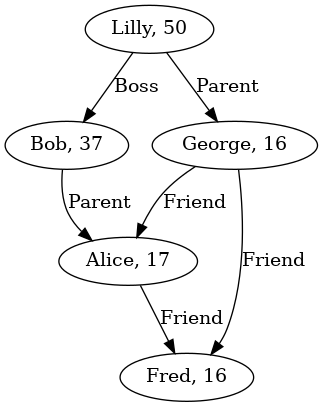

In [16]:
let mut social_graph : Graph<Person, Relationship> = Graph::new();

let bob = social_graph.add_node(Person{name: "Bob", age: 37});
let alice = social_graph.add_node(Person{name: "Alice", age: 17});
social_graph.add_edge(bob, alice, Relationship::Parent);

let lilly = social_graph.add_node(Person{name: "Lilly", age: 50});
social_graph.add_edge(lilly, bob, Relationship::Boss);

let george = social_graph.add_node(Person{name: "George", age: 16});
social_graph.add_edge(george, alice, Relationship::Friend);
social_graph.add_edge(lilly, george, Relationship::Parent);

let fred = social_graph.add_node(Person{name: "Fred", age: 16});
social_graph.add_edge(george, fred, Relationship::Friend);
social_graph.add_edge(alice, fred, Relationship::Friend);

draw_graph(&social_graph);
let original_social_graph = social_graph.clone();

Basic graph operations
---------------------------------

The most basic graph operations can be found directly as methods on the [`Graph`](https://docs.rs/petgraph/0.4.13/petgraph/graph/struct.Graph.html) struct.

One of the most common methods is the [`map`](https://docs.rs/petgraph/0.4.13/petgraph/graph/struct.Graph.html#method.map) method which applies given functions to each node and edge weight in the graph. This method **creates a new graph** and the functions can **change the type of the weights**.

```rust
pub fn map<'a, F, G, N2, E2>(
    &'a self, 
    node_map: F, 
    edge_map: G
) -> Graph<N2, E2, Ty, Ix> where
    F: FnMut(NodeIndex<Ix>, &'a N) -> N2,
    G: FnMut(EdgeIndex<Ix>, &'a E) -> E2, 
```

Here we increment the age of each person in the social graph.

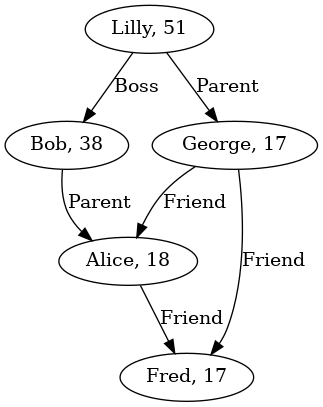

In [17]:
let mut social_graph_a_year_later = social_graph.map(
    |_, p| {
        let mut p = p.clone();
        p.age += 1;
        p
    },
    |_, x| x.clone()
);
draw_graph(&social_graph_a_year_later);

You can also **modify the weights in place** using the [`node_weights_mut`](https://docs.rs/petgraph/0.4.13/petgraph/graph/struct.Graph.html#method.node_weights_mut) and [`edge_weights_mut`](https://docs.rs/petgraph/0.4.13/petgraph/graph/struct.Graph.html#method.edge_weights_mut) iterators. This method **does not allow you to change the types of the weights**.

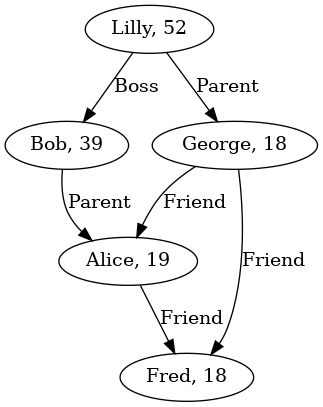

In [18]:
for person in social_graph_a_year_later.node_weights_mut(){
    person.age += 1;
}
draw_graph(&social_graph_a_year_later);

There are a large number of methods provided for `Graph`. Too many to list here. The last thing I'll mention about these methods is that methods wich remove nodes, such as [`filter_map`](https://docs.rs/petgraph/0.4.13/petgraph/graph/struct.Graph.html#method.filter_map) and [`remove_node`](https://docs.rs/petgraph/0.4.13/petgraph/graph/struct.Graph.html#method.remove_node) remove edges which are attached to the removed nodes, rather than leaving them dangling.

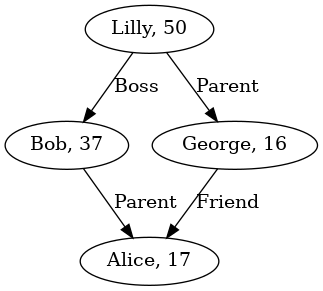

In [19]:
social_graph.remove_node(fred);
draw_graph(&social_graph);

Graph algorithms
--------------------------

Beyond the basic graph operations, petgraph also provides an array of graph algorithms in the module [`algo`](https://docs.rs/petgraph/0.4.13/petgraph/algo/index.html). These operations are well known and you can find their descriptions in most graph textbooks or on wikipedia.

I'll start by describing the functions `is_cyclic_directed` and `is_cyclcic_undirected`. These functions are very important, because the distinction between cyclic graphs and acyclic graphs plays a big role in determining which other algorithms can be applied to the graph.

In [20]:
use petgraph::algo::*;

In [21]:
println!("Is tree cyclic? {}", is_cyclic_undirected(&tree));
println!("Is social_graph cyclic? {}", is_cyclic_directed(&social_graph_a_year_later));
println!("Is social_graph cyclic if we ignore edge direction? {}", is_cyclic_undirected(&social_graph_a_year_later));
println!("Is ring cyclic? {}", is_cyclic_directed(&ring));

Is tree cyclic? false
Is social_graph cyclic? false
Is social_graph cyclic if we ignore edge direction? true
Is ring cyclic? true


Revisiting the types of graph: What is a DAG
-----------------------------------------------------------------

One constant of computer science is that data structures that are simple are used far more frequently than those which are complex. I started this article by claiming that graphs are the universal data structure. I went on to show how a the petgraph library can represent any datastructure from a variable, to a list, to a table, to a tree, to a dictionary/hashmap. All of these data structures, however, exist in far more efficent forms either directly as built in types in rust, or as provided in third party libraries. If you need to represent a list, tree or a table and nothing else, you should **never** use petgraph to do so. You should always use the most limited possible data structure which is capable of representing your data because doing so allows your compiler and typechecker to help you prevent bugs. If you write a function that takes a tree and does something with it, and it's type signature looks like:

```rust
fn cut_tree(tree: Tree) -> Stump {
```

Then you only need to test your function for various possible trees that could be given to that function. The type checker will ensure that only trees are passed to that function, and you do not need to wory about edge cases where something other than a tree might have been passed to it. But if your type signature looks like:

```rust
fn cut_tree(tree: Graph) -> Stump {
```

You'll need to test for all sorts of data structures that aren't trees in order to be sure that your program will behave correctly and will not crash.

The simplest, and therefore most common type of data structure that you actually need the power of petgraph to represent is called a **DAG** or **D**irected **A**cyclic **G**raph. DAGs are a lot like trees but their branches can merge.

This is a tree:

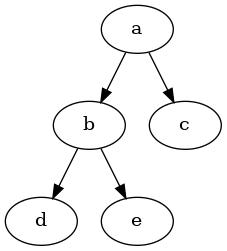

In [22]:
draw_graph(&tree);

And this is a DAG

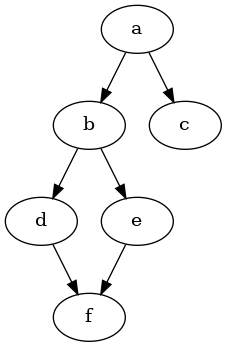

In [23]:
let mut dag = tree.clone();
let dag_item_f = dag.add_node("f");
dag.add_edge(tree_item4, dag_item_f, "");
dag.add_edge(tree_item5, dag_item_f, "");
draw_graph(&dag);

There is a certain hierarchy of data structures in computer science. All singletons are lists, all lists are tables. All lists are also trees. All trees (IFF they're edges are directed) are DAGs.

You can tell if a graph is a tree by running the `is_cyclic_undirected` function on it. If this function returns `false`, you're working with a tree.

In [24]:
use petgraph::*;

In [25]:
fn is_tree<'a, N: 'a, E: 'a, Ty, Ix>(g: &'a Graph<N, E, Ty, Ix>) -> bool
 where
  Ty: EdgeType,
  Ix: petgraph::graph::IndexType
{
    return !is_cyclic_undirected(g);
}

println!("Is tree a tree? {}", is_tree(&tree));
println!("Is dag a tree? {}", is_tree(&dag));

Is tree a tree? true
Is dag a tree? false


You can tell if a graph is a DAG if it is directed and `is_cyclic_directed` returns `false`.

In [26]:
fn is_dag<'a, N: 'a, E: 'a, Ty, Ix>(g: &'a Graph<N, E, Ty, Ix>) -> bool
 where
  Ty: EdgeType,
  Ix: petgraph::graph::IndexType
{
    return g.is_directed() && !is_cyclic_directed(g);
}

println!("Is tree a DAG? {}", is_dag(&tree));
println!("Is dag a DAG? {}", is_dag(&dag));
println!("Is ring a DAG? {}", is_dag(&ring));

Is tree a DAG? true
Is dag a DAG? true
Is ring a DAG? false


What are some examples of DAGs in the wild?
-------------------------------------------------------------------

- **POSIX file trees**: At a low level, the POSIX file system is implemented as a DAG. I know, we refer to the directory hierarchy as a file *tree*, but hard links allow for the merging of branches which makes them not trees in all cases. Since hard links can only be used to link two files, and not directories, cycles cannot be formed. At a higher level, if you take symlinks (which are actually just a special kind of file) into account, file trees are not even DAGs, but generalized graphs. 

- **Dependency graphs**: Traditional package managers in which  packages depend on one another, end up representing a DAG of packages. You cannot have cycles in such a graph, because the package manager never installs a package before it's dependencies have been installed.

- **Makefiles**: Makefiles are another case of doing steps which depend on eachother.

- **init system services**: In init systems such as sysv init and systemd the same property applies, that you start services who's dependencies have started first.

- **Rust struct declarations**: In rust, the structs which you have declared form a DAG. They cannot form a cycle because rust needs to know how large a struct within a struct is at compile time. This can be worked around by including pointers/references to other structs rather than including them directly.

- **Git commits**: Just the vocabulary of `branches` should suggest that there is a tree of git commits, but the existance of `merge` commits means that we're working with a DAG.

- **IPFS nodes**: In IPFS, which is a distributed Hashed DAG there are no cycles.

Why are DAGs so common?
-----------------------------------------

There are two properties at play here which make DAGs extremely usefull in computer science. The first is `watershedding`. Watershedding is the idea that some regions of your graph are clearly isolated from others. Remember the origional dag I mentioned?

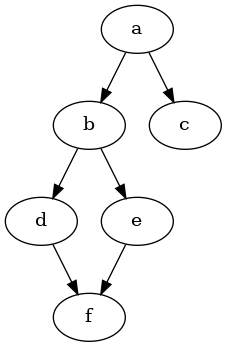

In [27]:
draw_graph(&dag);

There is no way to get from `e` to `b`. That's a good thing in some cases, and is the reason why POSIX file DAGs are DAGs and not generalized graphs. You want to be certain that when you type in

```bash
$ rm -rf /a/b/e
```

You'll be deleting only `e` and `f` and not your entire file system. If there wasever a loop like this:

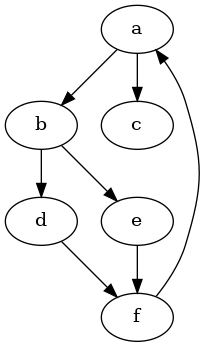

In [28]:
let mut general_graph = dag.clone();
general_graph.add_edge(dag_item_f, tree_item1, "");
draw_graph(&general_graph);

Then you could end up deleting all your files accidentally, and that would make POSIX harder to use and less predictable.

The second reason why DAGs are so common is more fundamental. With DAGs there is always a **clear order of operations**. That doesn't just make it easier to work with DAGs than general graphs, it makes a lot of things possible which simply cannot done otherwise.

The algorithm which tells you the order of operations for a DAG is called a **topological sort**, and is defined in petgraph's algo library as the [`toposort`](https://docs.rs/petgraph/0.4.13/petgraph/algo/fn.toposort.html) function.

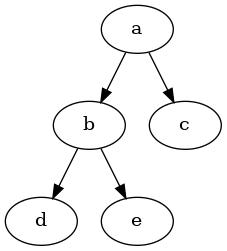

In [29]:
draw_graph(&tree);

In [30]:
fn print_topo_sort<'a, Ty, Ix>(g: &'a Graph<&'a str, &'a str, Ty, Ix>)
 where
  Ty: EdgeType,
  Ix: petgraph::graph::IndexType
{
    match toposort(g, None){
        Ok(order) => {
            print!("Sorted: ");
            for i in order {
                 g.node_weight(i).map(|weight| {
                     print!("{}, ", weight);
                     weight
                 });
             }
        },
        Err(err) => {
            g.node_weight(err.node_id()).map(|weight|
                println!("Error graph has cycle at node {}", weight));
        }
    }
    println!("");
}

print_topo_sort(&tree);

Sorted: a, c, b, e, d, 


Note that topological sorts are by their very nature non-deterministic functions. The only guarantee is that dependencies come before dependents, but when two nodes are at the same level, they can come in any order. Here, the output is `Sorted tree: a, c, b, e, d`, but it could just as easilly have been `Sorted tree: a, b, c, d, e`.

Sorted: a, c, b, e, d, f, 


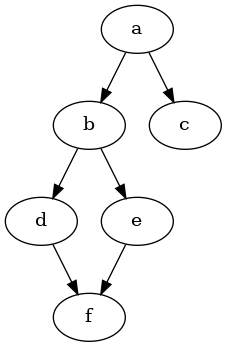

In [31]:
draw_graph(&dag);
print_topo_sort(&dag);

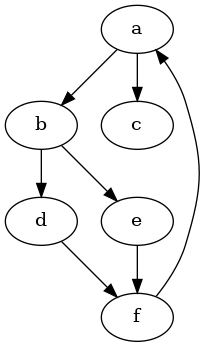

In [32]:
draw_graph(&general_graph);

In [33]:
print_topo_sort(&general_graph);

Error graph has cycle at node f



DAGs are reversible
-----------------------------

If you reverse the direction of the edges in a DAG, you end up with a DAG. This is an important thing to understand when working on a package manager, because if you want to uninstall a package and all of it's dependents, then you need to uninstall the dependents first. You can reverse the DAG with the [`reverse`](https://docs.rs/petgraph/0.4.13/petgraph/graph/struct.Graph.html#method.reverse) method, or, if you are working with a topolgical sort, simply by reversing the output of `toposort`.

More general graphs - Shortest path algorithms
----------------------------------------------------------------------

The other algorithms provided by petgraph are applicable to more general graphs. The best known are the shortest path and existant path algorithms. Specifically, the Dijkstra algorithm is widely taught as being a generally usefull and elegant algorithm in schools. I mentioned earlier that the values associated with edges in petgraph are called `weights` rather than `labels` as is done elsewhere. This is because these values can be used to calculate edge `cost` when evaluating the shortest distance algorithms. In the traditional map based questions, this cost is the literal distance (or travel time) between points. This cost can also be something else.

Here are some example graphs that you might use shortest length algorithms on:

- A computer network where the edge weights are the pings
- A computer network where the edge weights are the monitary cost per byte
- A computer network where the edge weights are both the pings AND the monitary cost per byte
- A network of tax juristictions where the edge weights are tarifs and other taxes and fees
- A market where the edge weights are cost of exchanging one good or security for another

All of these can be modeled by petgraph, however, **you probably shouldn't use petgraph for geospatial graphs** you should use a specialized library or database for this. Postgres, for example, can store geospatial data using the postgis addon and use [pgRouting](http://pgrouting.org/) to find the shortest paths. Specialized geospatial routing engines are able to use spatial heuristics such as direction to significantly speed up route finding.

Petgraph provides 3 shortest path algorithms. (Links are to wikipedia)

- [Dijkstra](https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm)
- [astar](https://en.wikipedia.org/wiki/A*_search_algorithm)
- [bellman_ford](https://en.wikipedia.org/wiki/Bellman%E2%80%93Ford_algorithm)

Dijkstra
------------

Here is [the type declaration](https://docs.rs/petgraph/0.4.13/petgraph/algo/fn.dijkstra.html) for petgraph's dijstra.

```rust
pub fn dijkstra<G, F, K>(
    graph: G, 
    start: G::NodeId, 
    goal: Option<G::NodeId>, 
    edge_cost: F
) -> HashMap<G::NodeId, K> where
    G: IntoEdges + Visitable,
    G::NodeId: Eq + Hash,
    F: FnMut(G::EdgeRef) -> K,
    K: Measure + Copy, 
```

Notice how the function returns a HashMap? What's up with that? A HashMap is not a path. It should be noted that Dijstra and astar are actually the same algorithm and the Dijstra implementation provided by petgraph is kind of useless, so I'll be ignoring the provided `dijstra` function.

A* (astar)
---------

[docs](https://docs.rs/petgraph/0.4.13/petgraph/algo/fn.astar.html)

```rust
pub fn astar<G, F, H, K, IsGoal>(
    graph: G, 
    start: G::NodeId, 
    is_goal: IsGoal, 
    edge_cost: F, 
    estimate_cost: H
) -> Option<(K, Vec<G::NodeId>)> where
    G: IntoEdges + Visitable,
    IsGoal: FnMut(G::NodeId) -> bool,
    G::NodeId: Eq + Hash,
    F: FnMut(G::EdgeRef) -> K,
    H: FnMut(G::NodeId) -> K,
    K: Measure + Copy, 
```

As I said, A* and Dijkstra are the same. The differenece is the `estimate_cost` function. This function allows the algorithm to have some heuristics about which direction to start looking in. It is especially usefull when using geospatial data. If you are trying to find the shortest path in terms of distance and you know the x y coordinates of each node in your graph, `estimate_cost` should return the distance as a crow flies from the given node to the start node. If you're looking for the shortest path in terms if travel time then you should take the crow flies distance and divide it by the top speed limit for the given mode of transportation. If you are doing network routing and you happen to be lucky enough to know the coordinates of each node in the network, then the speed limit is C, aka the speed of light. If you don't have any way of determining a heuristic, then return `0` and you have the Dijkstra algorithm.

Remember that old social graph example? Let's apply A* to it. Imagine that that kid Fred shares some sensitive private information on an employee of Lilly's. What is the most likely route by which the info got out? Lets say that such information is most likely to be shared between friends (with a virtual cost of 1), followed by sharing between familly members (lets give that a virtual cost of 2), and finally quite unlikely to be shared between collegues because they are accutely aware that sharing such information is illegal and wrong (cost of 5).

Lets start by declaring the cost and heuristic functions for our social graph.

In [34]:
fn rumor_spreading_cost(er : graph::EdgeReference<Relationship>) -> u32 {
    match *er.weight() {
        Relationship::Friend => 1,
        Relationship::Parent => 2,
        Relationship::Sibling => 2,
        Relationship::Child => 2,
        Relationship::Boss => 5,
    }
}

In [35]:
fn no_clue_heuristic<N>(nid: N) -> u32 {
    0
}

Now we'll get to actually calling the astar function. To find out how the rumor spread.

In [36]:
let (cost, path) = astar(
    &original_social_graph,
    lilly,
    |n| n == fred,
    rumor_spreading_cost,
    no_clue_heuristic,
).unwrap();

for node_ix in path.iter() {
    println!("{:?}", original_social_graph.node_weight(*node_ix).unwrap());
}

Person { name: "Lilly", age: 50 }
Person { name: "George", age: 16 }
Person { name: "Fred", age: 16 }


()

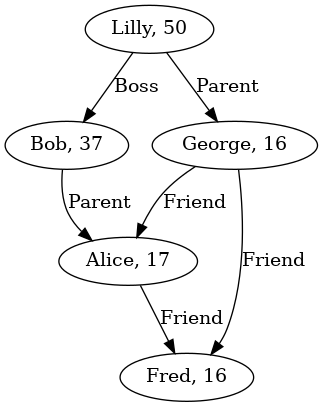

In [37]:
draw_graph(&original_social_graph);

So now we can see that the most likely scenario is that Lilly told her son George the private info who then told Fred.

Bellman Ford
--------------------
[docs](https://docs.rs/petgraph/0.4.13/petgraph/algo/fn.bellman_ford.html)

```rust
pub fn bellman_ford<G>(
    g: G, 
    source: G::NodeId
) -> Result<(Vec<G::EdgeWeight>, Vec<Option<G::NodeId>>), NegativeCycle> where
    G: NodeCount + IntoNodeIdentifiers + IntoEdges + NodeIndexable,
    G::EdgeWeight: FloatMeasure,
```

Bellman Ford differs from A*/Dijkstra in that it supports negative edge weights. This is usefull in cases such as when searching for optimal trade paths, because in some cases crossing a tax border can be a good thing due to the existance of subsidies. Ironically, Bellman Ford doesn't fair perfectly in this case, because it doesn't know how to deal with a situation where there is a negative edge weight cycle. Such a situation would lead to an infintely long shortest path ;). That sometimes happens in real life trade though, a country might grant an outgoing subsidy on a good while neglecting to impose an equal and oposite incomming tarif and we see ships sailing in circles just to collect infinite subsidies. `bellman_ford` does, however, return a `Result` with a `NegativeCycle` outcome if such a cycle does exist. Perhaps legislators should use petgraph's `bellman_ford` algorithm to detect such cycles before writing subsidies into law.

One of the first things I noticed when looking at `bellman_ford` is that rather than taking an `edge_cost` function like `astar` does, it just expects edge weights in the graph to be of the type `G::EdgeWeight: FloatMeasure`. This isn't that big of a deal, we can use the `map` method to map edges of any type to floats, but it does lead to potential memory inefficiency. `map` returns an new graph, which means that in order to use `bellman_ford` we may need to have the graph in memory twice for the duration of the path finding procedure, and that merely because of a design choice.

Another thing I noticed is that `bellman_ford` returns a tuple of two Vecs. One contains the length of each path, the other contains the "predecessor". Here is the exact docstring:

"
On success, return one vec with path costs, and another one which points out the predecessor of a node along a shortest path. The vectors are indexed by the graph's node indices.
"

For a while I didn't understand how this works. What is happening here, is that you should think of the second `Vec` as a map which maps nodes to nodes. If the `Option` is `None` that means the node is unreachable. If it is `Some(x)` that means that there is a path to that node and the previous node in that path is x. If that Vec looks like `let predicessors = vec![None,Some(0),Some(1),Some(2)]` that means that:

 - node with index 0 is unreachable
 - node 1 can be best reached via node 0
 - node 2 can be best reached via node 1
 - node 3 can be best reached via node 2
 
 Note that the source node is considered unreachable unless there is an actual path to it.
 
Lets imagine a situation, again in our social graph, in which Lilly wants to send money to people. There are different tax liabilities depending on her relationship to that person. There is a flat 30% income tax in this theoretical country and no gift tax between friends.

 - Employee need to pay a %30 income tax on all money comming from a boss
 - If a dependent (child) gets money up to two thirds of the money can be deducted from the parents income
 - Small transfers between friends are not taxed
 - Small transfers from children to parents are taxed at %20 to prevent a negative tax cycle

Lets figure out the best way for Lilly to send a christmass bonus to her employee Bob.

The first thing we need to do is realize that our social graph is directed, but it makes sense that friends should be able to transfer funds in either direction. Also, we haven't added Child → Parent relationships to our graph. We're going to need to add new edges based on the existing edges, to make these relationships bidirectional. Note, that we can't just convert the graph to a non-directed graph because in this case, the relationships are NOT symetrical from a taxation standpoint.

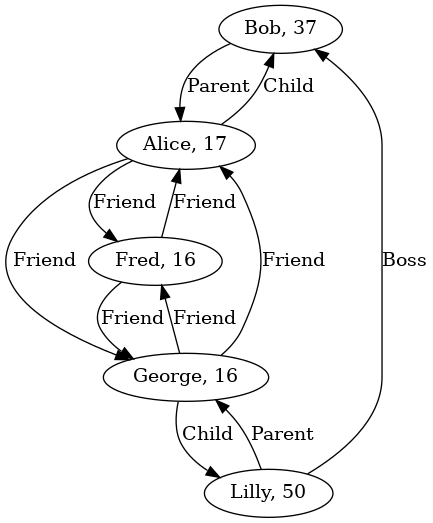

In [38]:
let mut bdsg = original_social_graph.clone(); //bidirectional_social_graph
for edge_ix in bdsg.edge_indices() {
    let (source, dest) = bdsg.edge_endpoints(edge_ix).unwrap();
    match *bdsg.edge_weight(edge_ix).unwrap() {
        Relationship::Parent => {
                bdsg.add_edge(dest, source, Relationship::Child);
        },
        Relationship::Friend => {
                bdsg.add_edge(dest, source, Relationship::Friend);
        },
        Relationship::Sibling => {
                bdsg.add_edge(dest, source, Relationship::Sibling);
        },
        _ => (),
    }
}
draw_graph(&bdsg);

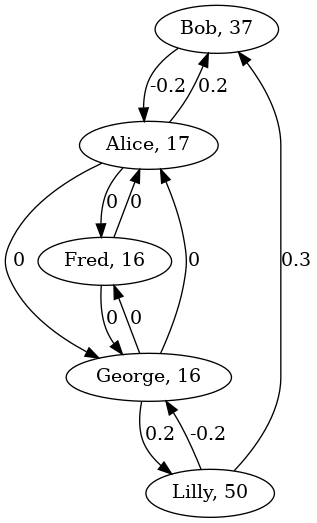

In [39]:
let social_graph_with_tax_costs = bdsg.map(
    |_, nw| nw.clone(),
    |_, ew| match ew {
        Relationship::Friend => 0.0,
        Relationship::Parent => -0.2,
        Relationship::Sibling => 0.0,
        Relationship::Child => 0.2,
        Relationship::Boss => 0.3,
    },
);
draw_graph(&social_graph_with_tax_costs);

In [40]:

println!("{:?}", bellman_ford(&social_graph_with_tax_costs, lilly));

Ok(([0.0, -0.2, 0.0, -0.2, -0.2], [Some(NodeIndex(1)), Some(NodeIndex(3)), None, Some(NodeIndex(2)), Some(NodeIndex(3))]))


So we have this output from the `bellman_ford` function, but how do we actually use it? How do we turn those two lists into an actual tax optimal path for sending money to Bob? First we need to understand what the "predicessor's" list actual is. It's a [shortest-path tree](https://en.wikipedia.org/wiki/Shortest-path_tree). We can visualize this tree as follows: 

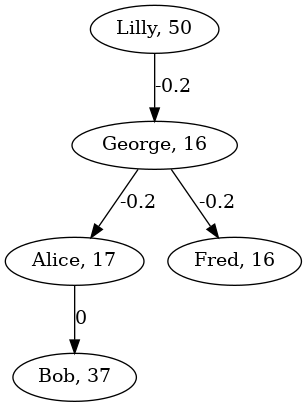

In [41]:
let (sgwtc_costs, sgwtc_predicessors) = bellman_ford(&social_graph_with_tax_costs, lilly).unwrap();
let mut spt_ = bdsg.clone();  //spt = Shortest path tree
spt_.clear_edges();
let mut spt = spt_.map(
    |_, nw| nw.clone(),
    |_, _| 0.0,
); // Use map to change type of edge weights to float.
let mut i = 0;
for op_node_ix in sgwtc_predicessors.iter() {
    match op_node_ix {
        Some(node_ix) => {
            spt.add_edge(*node_ix, graph::NodeIndex::new(i), sgwtc_costs[i]);
        }
        None => ()
    };
    i += 1;
}
draw_graph(&spt);

Since this is a review and not just a manual, I'd like to take a moment to point out a mistake that has been made in the api for `bellman_ford`. The function returns a tuple of two `Vec`s of identical length. This should *never* be done. The proper way to do things is to return ONE Vec of tuples. That way the compiler will ensure that for every path there is at least one, and exactly one, cost. This way, the for loop that I just wrote assumes that there will be a element at index `i` in `sgwtc_costs` but this is only an assumption, not a guarantee by the compiler. If that index did not exist, my code would crash. This is an easy mistake to make for a person comming from a language which is strongly typed, like C but not richly typed. You can have a "strongly typed" language where the only type is a string. Or perhaps `void *` ;) or `interface {}`. While you might feel that you gain some guarantees by using such a "strongly typed" language, the truth is, that guarantees about type saftey always come when a strongly typed language is used in concert with it's rich type system in order to construct types which provide the guarantees that you desire. Rust is a richly typed language and is capable of providing many detailed guarantees. One such guarantee is that in a list of pairs every item has it's pair.

Now back to work. I can see clearly by looking at the visualization of the shortest path tree that the best way for Lilly to send money to Bob is to give a tax deductible payment to her son George, who will then give a tax free gift to his friend Alice who will then give the money to Bob.

But how do we find that path programatically?

*Note that nothing in this article is intended as advice on how to evade taxes.*

Simple. We start at Bob's place in the predicessors Vec and we walk backwards.

In [58]:
let mut optimal_path_to_bob = vec![];
let mut n = bob.index();
while n != lilly.index() {
    match sgwtc_predicessors[n]{
        Some(node_ix) => {
            optimal_path_to_bob.push(node_ix);
            n = node_ix.index();
        }
        None => ()
    }
};

optimal_path_to_bob.reverse();

for step in optimal_path_to_bob.iter() {
    println!(
        "{}",
        social_graph_with_tax_costs.node_weight(*step).unwrap());
};

Lilly, 50
George, 16
Alice, 17


Internal representation of graphs by petgraph
------------------------------------------------------------------



`Graph`s are stored in a simple adjacency list and the code is self explanitory:

```rust
pub struct Graph<N, E, Ty = Directed, Ix = DefaultIx> {
    nodes: Vec<Node<N, Ix>>,
    edges: Vec<Edge<E, Ix>>,
    ty: PhantomData<Ty>,
}
```

A vertex is refered to as a node and that labels are refered to as weights.

```rust
pub struct Node<N, Ix = DefaultIx> {
    /// Associated node data.
    pub weight: N,
    /// Next edge in outgoing and incoming edge lists.
    next: [EdgeIndex<Ix>; 2],
}
```
...
```rust
pub struct Edge<E, Ix = DefaultIx> {
    /// Associated edge data.
    pub weight: E,
    /// Next edge in outgoing and incoming edge lists.
    next: [EdgeIndex<Ix>; 2],
    /// Start and End node index
    node: [NodeIndex<Ix>; 2],
}
```
...


